<a href="https://colab.research.google.com/github/sinkerball/2023AI/blob/main/%ED%95%A9%EA%B2%A9%EC%97%AC%EB%B6%80%ED%8C%90%EB%8B%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/admit.txt', names=['ex1','ex2','Admitted'])
print(data)

X = np.c_[data['ex1'], data['ex2']]
y = data['Admitted']
m = len(data)

Mounted at /content/drive
          ex1        ex2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
..        ...        ...       ...
95  83.489163  48.380286         1
96  42.261701  87.103851         1
97  99.315009  68.775409         1
98  55.340018  64.931938         1
99  74.775893  89.529813         1

[100 rows x 3 columns]


In [2]:
print(X.shape,y.shape)

(100, 2) (100,)


In [3]:
pos = []
neg = []

for (i,val) in enumerate(y):
  if val==1:
    pos.append(i)
  else:
      neg.append(i)
      print(pos)
      print(neg)

[]
[0]
[]
[0, 1]
[]
[0, 1, 2]
[3, 4]
[0, 1, 2, 5]
[3, 4, 6, 7, 8, 9]
[0, 1, 2, 5, 10]
[3, 4, 6, 7, 8, 9]
[0, 1, 2, 5, 10, 11]
[3, 4, 6, 7, 8, 9, 12, 13]
[0, 1, 2, 5, 10, 11, 14]
[3, 4, 6, 7, 8, 9, 12, 13, 15, 16]
[0, 1, 2, 5, 10, 11, 14, 17]
[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19]
[0, 1, 2, 5, 10, 11, 14, 17, 20]
[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22]
[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23]
[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23, 27]
[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23, 27, 28]
[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29]
[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30, 31]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32]
[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30,

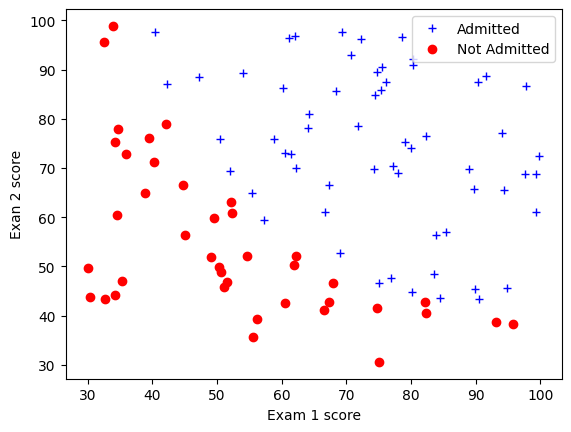

In [5]:
import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1),'b+', label='Admitted')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1),'ro', label='Not Admitted')
plt.xlabel("Exam 1 score")
plt.ylabel("Exan 2 score")
plt.legend(loc='upper right')
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear',C=10)
log_reg.fit(X,y)

LogisticRegression(C=10, solver='liblinear')

In [7]:
log_reg.predict([[30,70],[50,90]])

array([0, 1])

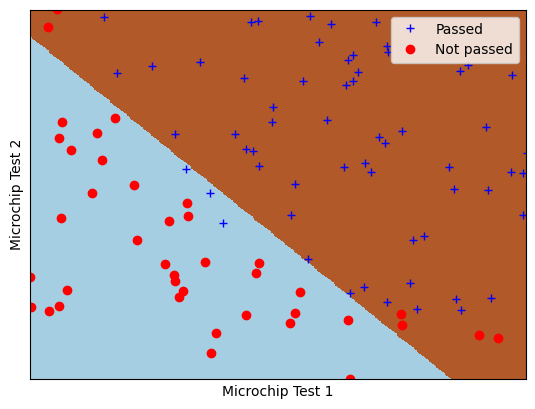

In [8]:
x_min,x_max = X[:,0].min(),X[:,0].max()
y_min,y_max = X[:,1].min(),X[:,1].max()
h = .2
xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = log_reg.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1),'b+',label='Passed')
plt.plot(X[neg,0].reshape(-1),X[neg,1].reshape(-1),'ro',label='Not passed')
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc='upper right')

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())

plt.show()